In [1]:
from opm_thesis.read_files.cMEG2fif_bespoke import get_data_mne
from opm_thesis.preprocessing.preprocessing import Preprocessing
import mne
import numpy as np

In [2]:
data_dir = r"C:\Users\user\Desktop\MasterThesis\data_nottingham"
acq_times = ["155445", "160513", "161344", "163001", "164054", "165308"]
raw, events, events_id = get_data_mne(data_dir, day="20230622", acq_time=acq_times[0])
preprocessing = Preprocessing(raw, events, events_id)

Loading File


Sorting Sensor Information
Creating MNE Info
Sensor Location Information
Create raw object
Creating RawArray with float64 data, n_channels=203, n_times=540720
    Range : 0 ... 540719 =      0.000 ...   450.599 secs
Ready.
Not setting metadata
97 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 97 events and 2401 original time points ...
0 bad epochs dropped


In [3]:
epochs = preprocessing.epochs.copy()

from autoreject import AutoReject
ar = AutoReject(n_jobs=-1, verbose='tqdm')  # Use 'n_jobs=-1' to use all available CPU cores for parallel processing
ar.fit(epochs.copy().pick(['meg']))  # Fit the autoreject object to the data (only MEG channels
clean_epochs, reject_log = ar.transform(epochs.copy().pick(['meg']), return_log=True)

Running autoreject on ch_type=mag


c:\Users\user\Desktop\MasterThesis\opm-thesis\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| Creating augmented epochs : 174/174 [01:10<00:00,    2.48it/s]
100%|██████████| Computing thresholds ... : 174/174 [05:00<00:00,    1.73s/it]

































































































100%|██████████| Repairing epochs : 97/97 [00:06<00:00,   14.08it/s]


































































































100%|██████████| Repairing epochs : 97/97 [00:26<00:00,    3.63it/s]






















100%|██████████| Fold : 10/10 [01:58<00:00,   11.84s/it]


































































































100%|██████████| Repairing epochs : 97/97 [00:27<00:00, 





Estimated consensus=0.40 and n_interpolate=4




































































































100%|██████████| Repairing epochs : 97/97 [00:17<00:00,    5.64it/s]


Dropped 46 epochs: 0, 3, 4, 6, 10, 11, 16, 18, 23, 25, 28, 29, 31, 33, 36, 37, 40, 41, 43, 44, 45, 46, 47, 48, 49, 51, 53, 54, 56, 57, 64, 65, 68, 69, 70, 72, 74, 78, 79, 80, 81, 82, 85, 92, 94, 95


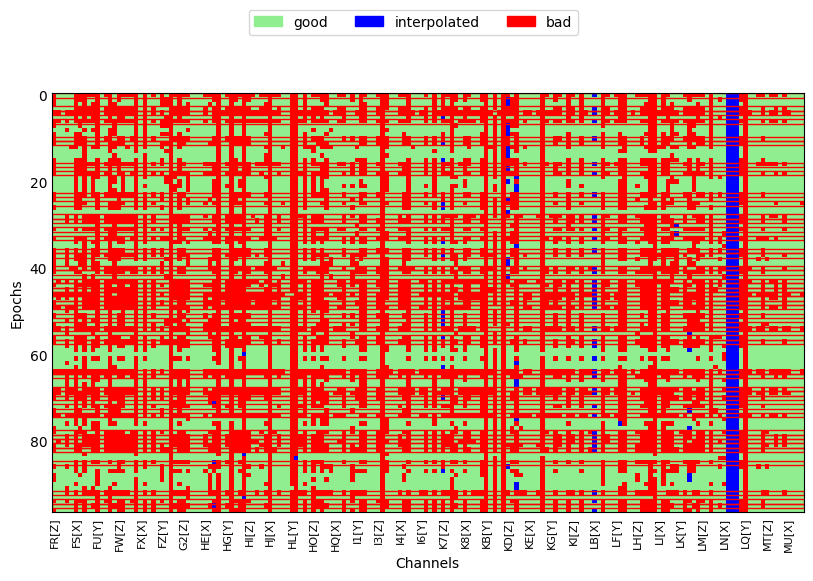

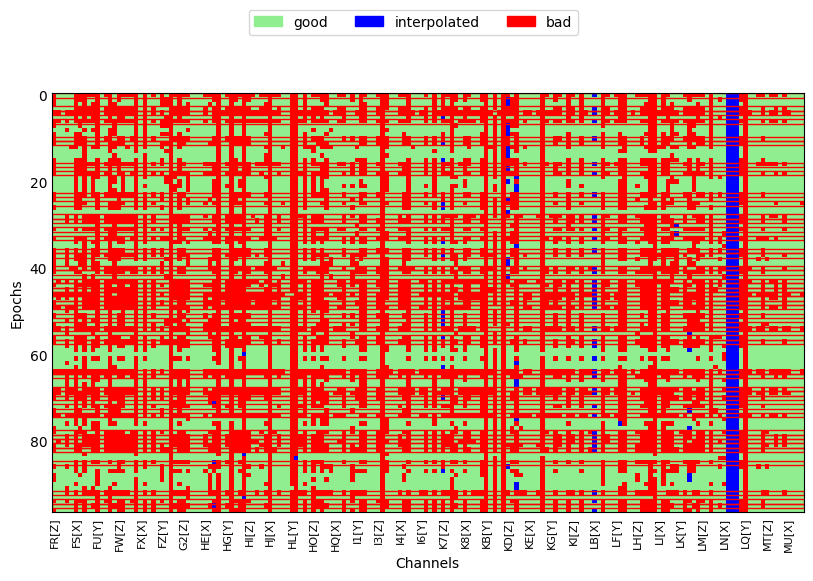

In [5]:
reject_log.plot()

In [11]:
raw1, events1, events_id1 = get_data_mne(data_dir, day="20230622", acq_time=acq_times[3])
preprocessing1 = Preprocessing(raw1, events1, events_id1)
epochs = preprocessing1.epochs.copy()

from autoreject import AutoReject
ar1 = AutoReject(n_jobs=-1, verbose='tqdm')  # Use 'n_jobs=-1' to use all available CPU cores for parallel processing
ar1.fit(epochs.copy().pick(['meg']))  # Fit the autoreject object to the data (only MEG channels
clean_epochs1, reject_log1 = ar1.transform(epochs.copy().pick(['meg']), return_log=True)
print(ar1)

Loading File
Sorting Sensor Information
Creating MNE Info
Sensor Location Information
Create raw object
Creating RawArray with float64 data, n_channels=203, n_times=546000
    Range : 0 ... 545999 =      0.000 ...   454.999 secs
Ready.
Not setting metadata
98 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 98 events and 2401 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=mag


100%|██████████| Creating augmented epochs : 174/174 [01:38<00:00,    1.77it/s]
100%|██████████| Computing thresholds ... : 174/174 [05:32<00:00,    1.91s/it]


































































































100%|██████████| Repairing epochs : 98/98 [00:02<00:00,   47.22it/s]



































































































100%|██████████| Repairing epochs : 98/98 [00:18<00:00,    5.16it/s]






















100%|██████████| Fold : 10/10 [01:10<00:00,    7.07s/it]



































































































100%|██████████| Repairing epochs : 98/98 [00:18<00:00,    5.32it/s]






















100%|██████████| Fold : 10/10 [01:14<00:00,    7.44s/it]



































































































100%|██████████| Repairing epochs : 98/98 [00:18<00:00,    5.21it/s]


















Estimated consensus=0.90 and n_interpolate=1





































































































100%|██████████| Repairing epochs : 98/98 [00:35<00:00,    2.74it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.
AutoReject(consensus=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
      cv=10, n_interpolate=array([ 1,  4, 32]), n_jobs=-1, picks=None,
      random_state=None, thresh_method='bayesian_optimization',
      verbose='tqdm')


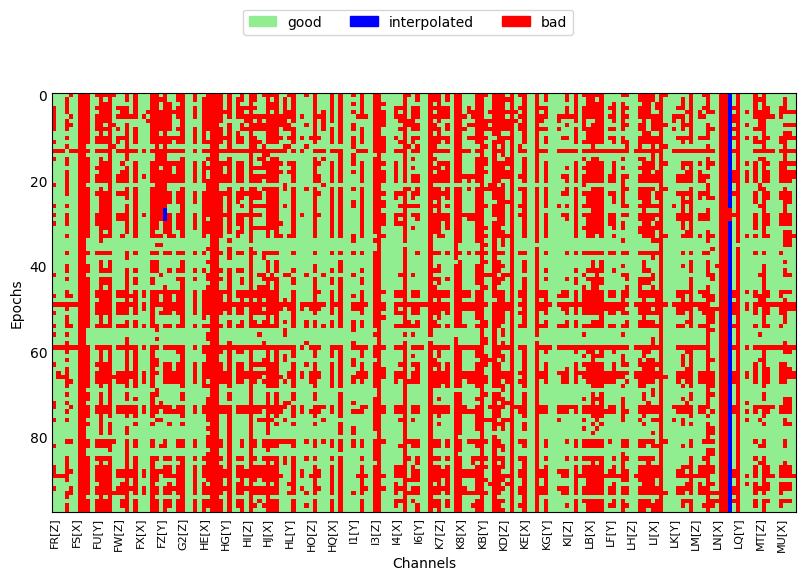

AttributeError: 'Figure' object has no attribute 'xticks'

In [18]:
fig = reject_log1.plot()
fig.xticks()